In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools
from matplotlib_venn import venn2
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Motivation

Finding the earliest genes that drive Alzheimer's disease(AD).  It is expected that those early genes tend to be contained in the differentially expressed gene sets (DEGs) emerging from comparing APOE3 vs APOE4 carrying iPSCs.  We have been working with three of such DEG sets:
1. 'APOE3-4 DE neuron'
1. 'APOE3-4 DE astrocyte'
1. 'APOE3-4 DE microglia'

However, it may also be expected that these gene sets also contain genes involved in later stages of AD.  To isolate the early genes from the late genes we define late genes in terms of other gene sets below such as 'knowledge', 'TWAS2+',...

## Preparations

In [2]:
fpath_gset = {\
'knowledge': '../../results/2021-07-01-high-conf-ADgenes/AD-genes-knowledge-extended',
'TWAS2+': '../../results/2021-07-01-high-conf-ADgenes/AD-genes-TWAS2plus',
'agora2+': '../../resources/agora/AD-genes-agora-2plus-nominations',
'agora': '../../resources/agora/AD-genes-agora',
'DESudhir': '../../resources/CMap/sudhir-varma/up-down.genes-noNAs',
'AD DE APOE3-APOE3': '../../results/2021-11-28-ad-de-genes-apoe/ad-de-genes-apoe3-apoe3',
'AD DE APOE4-APOE4': '../../results/2021-11-28-ad-de-genes-apoe/ad-de-genes-apoe4-apoe4',
'APOE3-4 DE neuron': '../../results/2021-12-08-apoe-de-genes-tunahan/Neuron-apoe-de',
'APOE3-4 DE astrocyte': '../../results/2021-12-08-apoe-de-genes-tunahan/Astrocyte-apoe-de',
'APOE3-4 DE microglia': '../../results/2021-12-08-apoe-de-genes-tunahan/Microglia-like-apoe-de',
'rMTA-APOE3-4': '../../results/2022-02-25-dilara-rmta-geneset/rmta-apoe3-apoe4',
             }

In [3]:
def read_gset(fpath):
    with open(fpath) as f:
        gset = set([s.strip() for s in f.readlines()])
    return(gset)

gset = {name: read_gset(fpath) for name, fpath in fpath_gset.items()}

## Early and late AD genes

In [4]:
lates = ['knowledge', 'TWAS2+', 'agora2+', 'AD DE APOE3-APOE3', 'AD DE APOE4-APOE4']
late_genes = functools.reduce(lambda a, b: a.union(b), [gset[k] for k in lates])
earlies = ['APOE3-4 DE neuron', 'APOE3-4 DE astrocyte', 'APOE3-4 DE microglia']
early_genes = functools.reduce(lambda a, b: a.union(b), [gset[k] for k in earlies])
print(len(late_genes), 'late AD genes')
print(len(early_genes), 'APOE3-4 DE genes')

583 late AD genes
368 APOE3-4 DE genes


['named-figure/APOE3-4-DE-minus-late.png',
 'named-figure/APOE3-4-DE-minus-late.pdf']

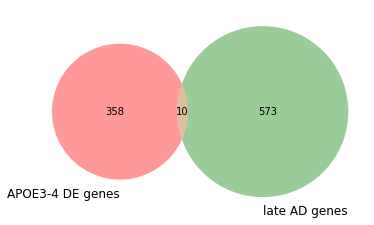

In [5]:
partition = dict()
partition['10'] = early_genes.difference(late_genes)
partition['01'] = late_genes.difference(early_genes)
partition['11'] = early_genes.intersection(late_genes)
subsets = {k: len(v) for k, v in partition.items()}
fig, ax = plt.subplots()
venn2(subsets=subsets, set_labels=('APOE3-4 DE genes', 'late AD genes'), ax=ax)
attila_utils.savefig(fig, 'APOE3-4-DE-minus-late')

['named-figure/APOE3-4-DE-minus-late-celltype.png',
 'named-figure/APOE3-4-DE-minus-late-celltype.pdf']

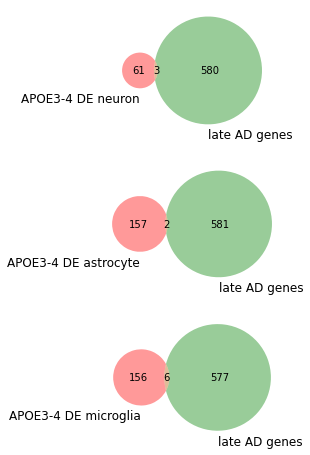

In [6]:
def my_venn2(early, ax):
    partition = dict()
    partition['10'] = gset[early].difference(late_genes)
    partition['01'] = late_genes.difference(gset[early])
    partition['11'] = gset[early].intersection(late_genes)
    subsets = {k: len(v) for k, v in partition.items()}
    venn2(subsets=subsets, set_labels=(early, 'late AD genes'), ax=ax)

fig, ax = plt.subplots(len(earlies), 1, figsize=(8, 8))
for early, axi in zip(earlies, ax):
    my_venn2(early, axi)

attila_utils.savefig(fig, 'APOE3-4-DE-minus-late-celltype')

In [7]:
%connect_info

{
  "shell_port": 52707,
  "iopub_port": 52708,
  "stdin_port": 52709,
  "control_port": 52711,
  "hb_port": 52710,
  "ip": "127.0.0.1",
  "key": "be744e66-acf9330c6c590762317d86b3",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-0d36673f-4210-42f4-89bf-43d62c5e9f7f.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
